# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

ANSWER: Although theoretically probable that a user could get any number from 0 to 100 elixirs. On average, users will get around 15 elixirs.

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

ANSWER: It is theoretically possible that a user could open an infinite number of loot boxes and not get an elixir.

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
p_elixir = 0.15
n_trials = 100

dist = stats.binom(100,0.15)

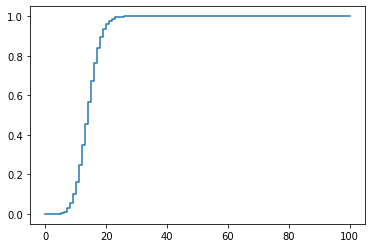

In [3]:
probs = [dist.cdf(x) for x in range(101)]
x_s = range(101)

plt.step(x_s, probs);

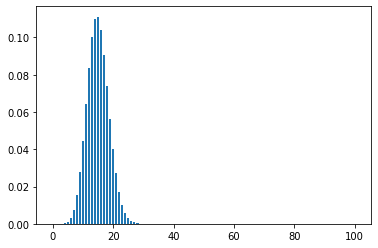

In [4]:
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
p_elixir = 0.15
n_trials = 100
dist = stats.binom(100, 0.15)
pmf = [dist.pmf(x) for x in range(101)]
# probs = [dist.cdf(x) for x in range(101)]
x_s = range(101)
plt.bar(x_s, pmf);

In [5]:
dist.cdf(3) #at least 3

9.285145440612455e-05

In [6]:
#at least 3 to 100

1 - dist.cdf(2)

0.9999848840805047

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

Because it (number of elixirs) is countable.

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

Binomial Distribution - since there are two outcomes with many independent trials.

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [7]:
# Show your work; leave your answer in a comment.

import numpy as np
import scipy.stats as stats

In [8]:
#setup a binomial distribution
# need p_success
p_elixir = 0.15
n_experiments = 100

dist = stats.binom(n_experiments, p_elixir) 

In [9]:
prob = 0
for i in range(21, 101):
    prob += dist.pmf(i)
print(f'The probability of a user getting more than 20 elixirs is: {round(prob * 100, 4)}%')

The probability of a user getting more than 20 elixirs is: 6.632%


#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

In [10]:
cdf_20 = 1 - dist.cdf(20)

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

In [11]:
print (f'The probability of getting more than 20 elixirs is: {round(cdf_20*100,3)}%')

The probability of getting more than 20 elixirs is: 6.632%


#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

The Poisson distribution would be used since it represents a count of events within a period of time.

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [12]:
# Show your work; leave your answer in a comment.

min_revenue = 500_000 #at least $500,000 in revenue met
avg_box_purch = 2.7   #loot boxes purchased last month per customer on average

users_needed = min_revenue / avg_box_purch # customers need for at least $500,000 in revenue

print(f'We would need at least {int(round(users_needed,-3)):,} customers for revenue to be at least $500,000.')


We would need at least 185,000 customers for revenue to be at least $500,000.


#### 4c. Assume that your platform has the number of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [13]:
# Show your work; leave your answer in a comment.

#Given
avg_cust    = 2.7
cust_dist   = stats.poisson(avg_cust)

# percent of customers with 5 or more purchases i.e. "high value user"
pct_hvu     =  1 - cust_dist.cdf(4) 


# High value users
print(f'Percent of "high value users"(hvu)        :  {round(pct_hvu*100)}%')
print()
num_hvu     = pct_hvu * users_needed


# Revenue from hvs = hvs users * dollars/user (minimum)
hvu_revenue = num_hvu * 5 
print(f'Revenue generated from "high value users" : ${int(round(hvu_revenue,-3)):,}')


# Low value users revenue
pct_lvu     = cust_dist.cdf(4)
lvu_revenue = pct_lvu * users_needed * 2.7
lvu_revenue = int(round(lvu_revenue,-3))

print(f'Revenue generated from "low value users"  : ${int(round(lvu_revenue,-3)):,}')



Percent of "high value users"(hvu)        :  14.0%

Revenue generated from "high value users" : $127,000
Revenue generated from "low value users"  : $431,000


#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

Total amount of revenue generated last month from loot box purchases is a little over \$500,000.

This was from a total of 185,000 customers, 14\% of which were "high value users" who purchased 5 or more loot boxes. 

High value users revenue was $127,000.

The rest of our customer base,"low value users", purchased $431,000 in revenue.

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [14]:
import numpy as np

In [15]:
loot_box = [0,1]
trials = []

for i in range(100_000):
    trial = 0
    opened = np.random.choice(loot_box, p = [.85, .15])
    trial += 1
    while opened ==  0:
        trial += 1
        opened = np.random.choice(loot_box, p = [.85, .15])
 
    
    
    trials.append(trial)
        
#print(trials)

In [16]:
type(trials)

list

In [17]:
#trials = np.array(trials)
#trials

In [18]:
fifth_pctl  = np.percentile(trials,50)
print(fifth_pctl)

5.0


In [19]:
#Share the 5th, 25th, 50th, 75th, and 95th percentiles.

#fifth_pctl  = np.percentile(trials,95) #Test 
#print(fifth_pctl)


percentiles = [5,25,50,75,95]
pcntl = 0
for x in percentiles:
    pcntl = np.percentile(trials,x)
    print(f'The {x}th percentile is {pcntl}')
    

The 5th percentile is 1.0
The 25th percentile is 2.0
The 50th percentile is 5.0
The 75th percentile is 9.0
The 95th percentile is 19.0


In [20]:
pwd

'/Users/robertmunoz/dsi/SF-FLEX-10/1.02-lab-loot-boxes'

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

Dictionary would be the best way since item(key) is matched with a value. 

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

Measuring the revenue from each of the 4 items (elixir, pendant, armor and bronze coin).